In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [3]:
df.shape[0]

180

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


##### No null values in the data

In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


###

## UNIVARIATE ANALYSIS

In [7]:
df_temp = df["Product"].value_counts().reset_index()
df_temp

,index,Product
0,KP281,80
1,KP481,60
2,KP781,40


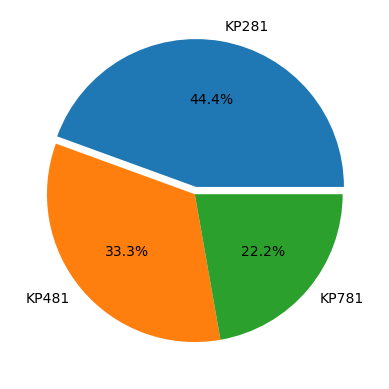

In [8]:
plt.pie(df_temp["Product"], labels=df_temp["index"],autopct='%.1f%%',explode=(0.05,0,0))
plt.show()

##### most selling is KP281

<AxesSubplot:xlabel='Age', ylabel='Count'>

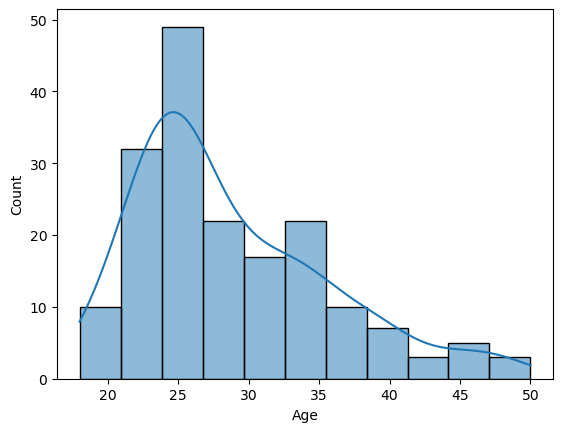

In [9]:
df["Age"].value_counts()
sns.histplot(data = df, x = "Age", kde=True)

##### most buying age group is around 25 years old

In [10]:
df_temp = df["Gender"].value_counts().reset_index()
df_temp

,index,Gender
0,Male,104
1,Female,76


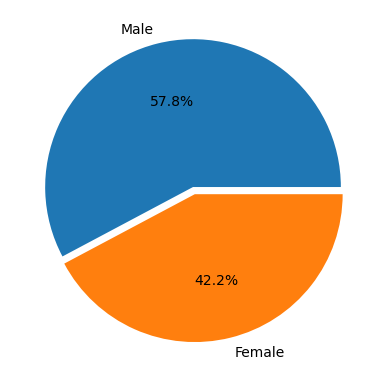

In [11]:
plt.pie(df_temp["Gender"], labels=df_temp["index"],autopct='%.1f%%',explode=(0.05,0))
plt.show()

In [12]:
df_temp = df["Education"].value_counts().reset_index().sort_values("index")

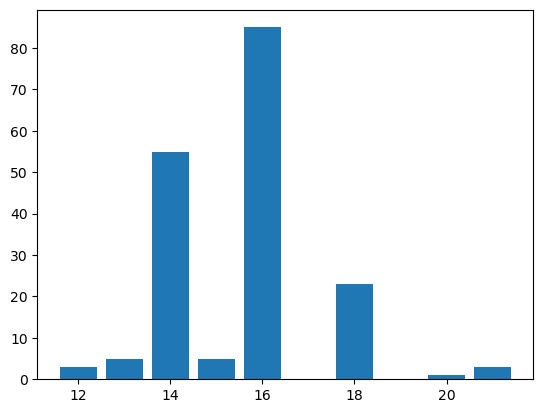

In [13]:
plt.bar(df_temp["index"], df_temp["Education"])
plt.show()

##### most of people belong to 14 or 16 or 18 years of education

In [14]:
df_temp = df["MaritalStatus"].value_counts().reset_index()

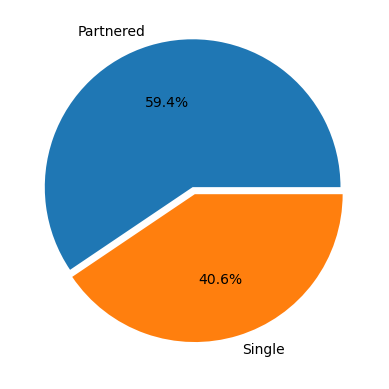

In [15]:
plt.pie(df_temp["MaritalStatus"], labels=df_temp["index"],autopct='%.1f%%',explode=(0.05,0))
plt.show()

##### Partnered people are buying morethan the single one's

<AxesSubplot:xlabel='Income'>

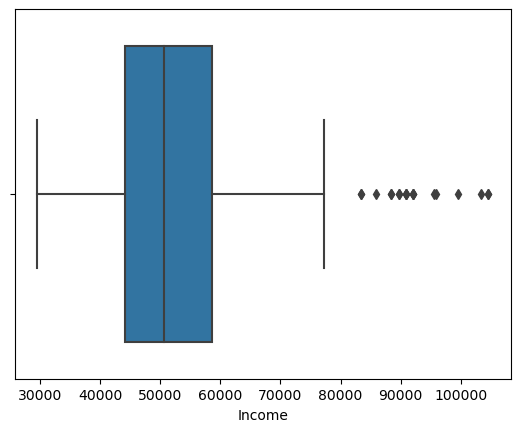

In [16]:
sns.boxplot(data = df, x = "Income")

In [17]:
df["Income_rupees"] = df["Income"]*(81)

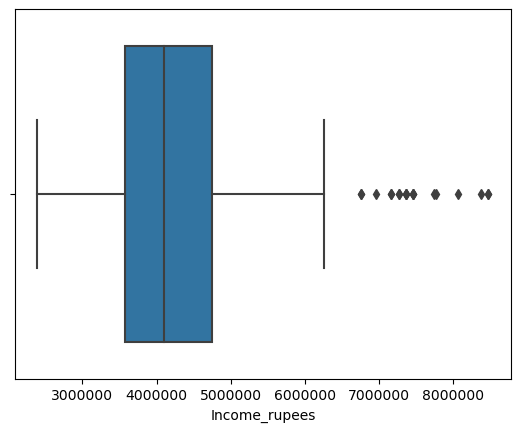

In [18]:
sns.boxplot(data = df, x = "Income_rupees")
plt.ticklabel_format(useOffset=False, style='plain',axis="x")
plt.show()

##### 75 percentile data is in between 35L to 47.5L Income

In [19]:
df_temp = df["Usage"].value_counts().reset_index()

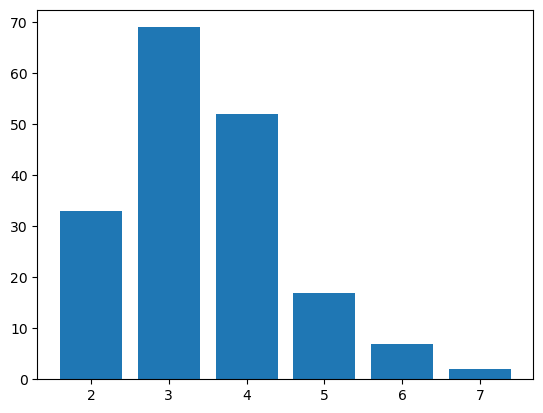

In [20]:
plt.bar(df_temp["index"], df_temp["Usage"])
plt.show()

##### most times used are 3 or 4 per week

In [21]:
df_temp = df["Fitness"].value_counts().reset_index()

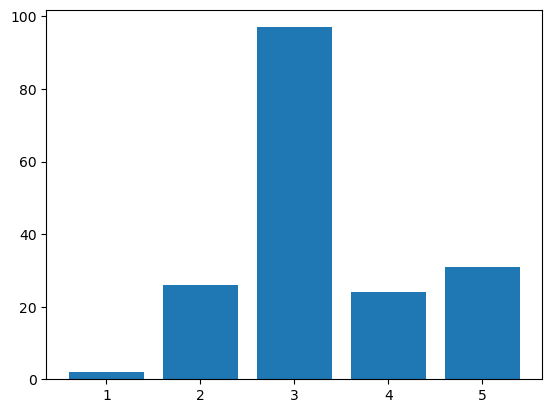

In [22]:
plt.bar(df_temp["index"], df_temp["Fitness"])
plt.show()

##### majority rated themeselfs 3 out of 5

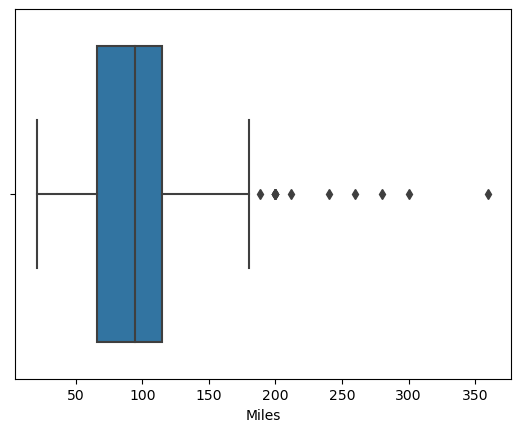

In [23]:
sns.boxplot(data = df, x = "Miles")
plt.show()

##### 75 percentile data indicates using product for 65 to 115 miles per week

## suggestions
    => the durability tests of these products should consider 
                120 miles per week as minimum criteria
                3-4 different sessions in a week
                
    

###

## BIVARIATE ANALYSIS

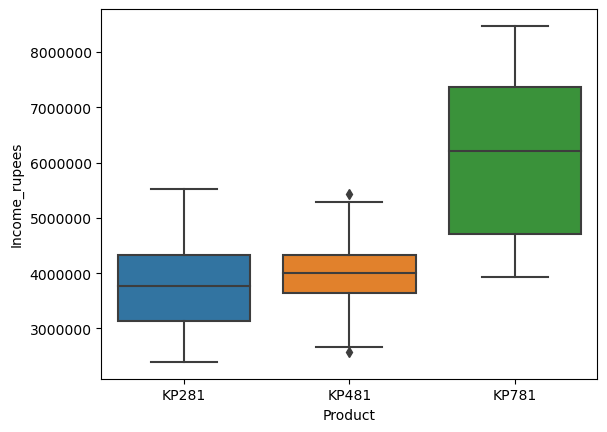

In [24]:
sns.boxplot(data = df, y= "Income_rupees", x = "Product")
plt.ticklabel_format(useOffset=False, style='plain',axis="y")
plt.show()

##### for product KP781 median income is 62L and for a person whose income is morethan 50L is mostlikely to buy KP781

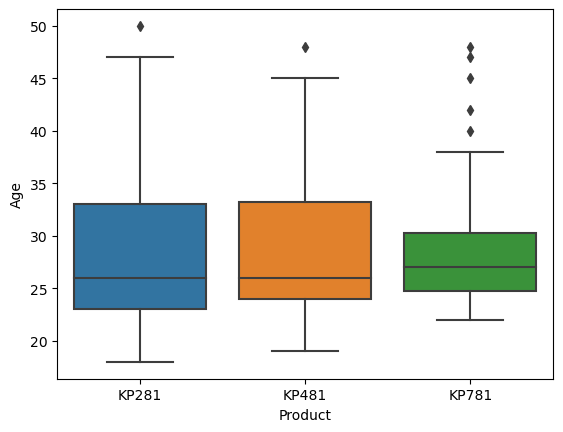

In [25]:
sns.boxplot(data = df, y= "Age", x = "Product")
plt.show()

##### for kp781 the age 75 percentile of data lies between 25 - 32

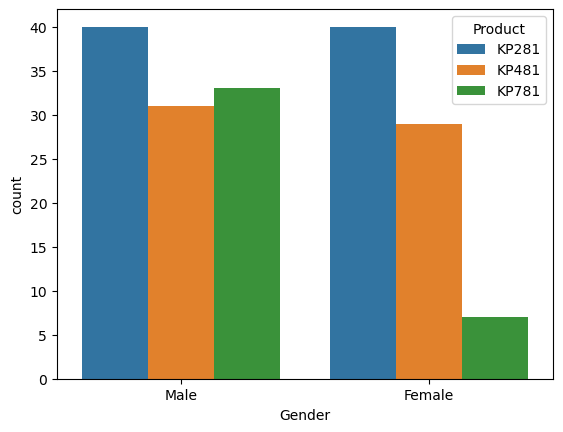

In [26]:
sns.countplot(data = df, x= "Gender", hue="Product")
plt.show()

##### for products KP281 and KP481 gender is not playing any role

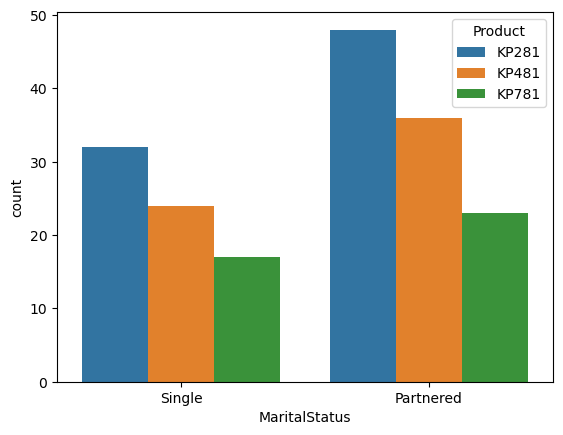

In [27]:
sns.countplot(data = df, x= "MaritalStatus", hue="Product")
plt.show()

##### MaritalStatus not playing significant role

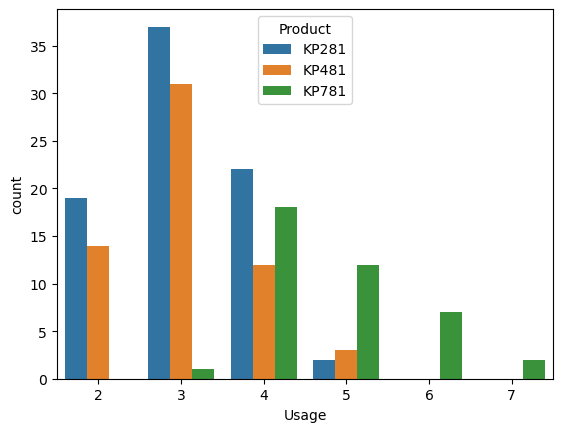

In [28]:
sns.countplot(data = df, x= "Usage", hue="Product")
plt.show()

#####  for the people who will be using morethan 5 times a week are going for KP781
    <=3 : will go for KP281 or KP481
    ==4 : go for anyone of three

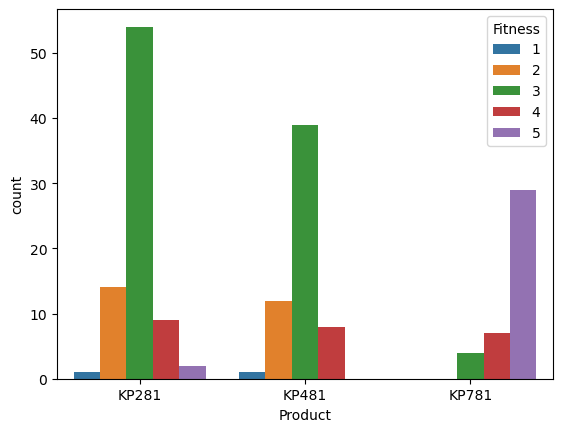

In [29]:
sns.countplot(data = df, x="Product", hue="Fitness")
plt.show()

##### product vs fitness
    fitness == 5 : they are going for KP781 (only 2 not obeying this bcz their income is less)
    fitness == 1 : are going for KP281 or KP481

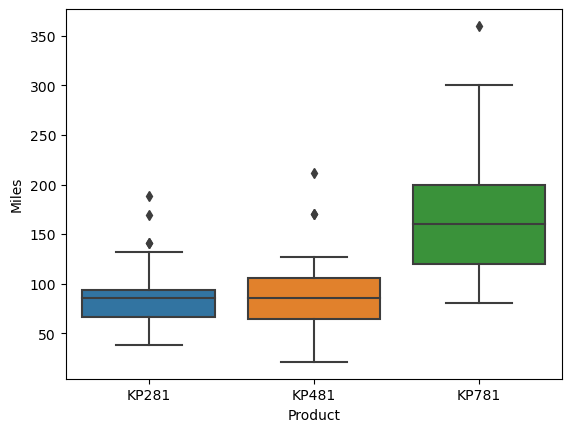

In [30]:
sns.boxplot(data = df, x="Product", y="Miles")
plt.show()

##### product vs miles
    more than 125 miles are likely to buy KP781

###

## MULTIVARIATE ANALYSIS

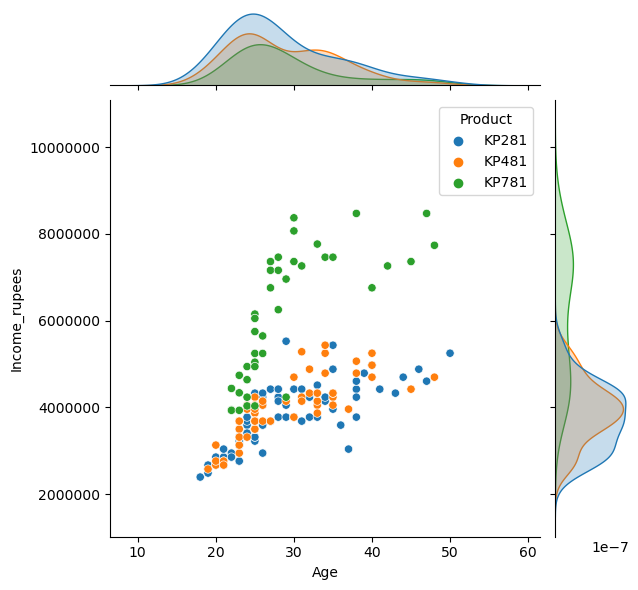

In [31]:
sns.jointplot(data = df, y="Income_rupees", x="Age", hue = "Product")
plt.ticklabel_format(useOffset=False, style='plain',axis="y")
plt.show()

##### age vs income vs product
    => income greater than 58L will buy KP781
    => for income greater than 40L they will still go for KP781 if their age range is 22-26
    

<AxesSubplot:xlabel='Gender', ylabel='Income'>

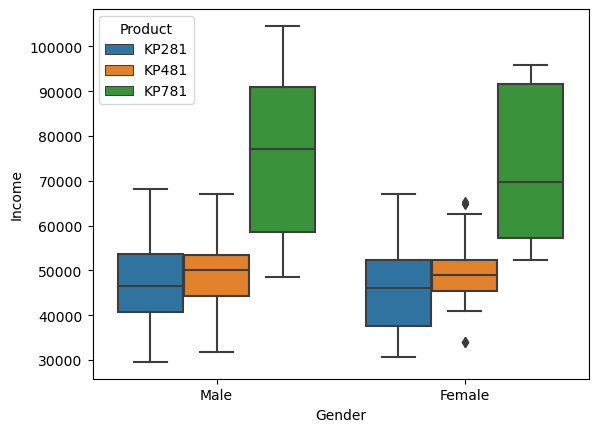

In [32]:
sns.boxplot(data = df, y="Income", x="Gender", hue = "Product")

##### Both genders are behaving same  w.r.t to buying product when income is same

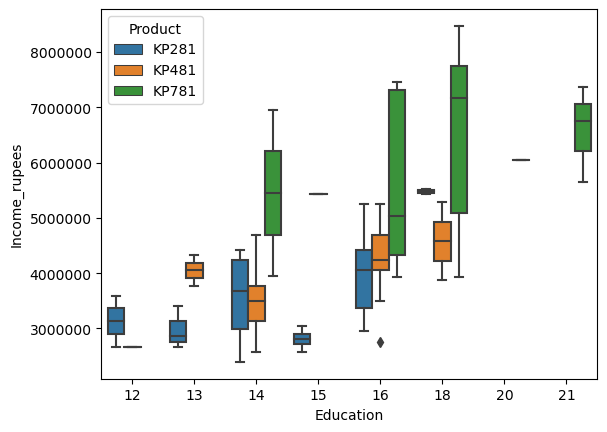

In [33]:
sns.boxplot(data = df, y="Income_rupees", x="Education", hue = "Product")
plt.ticklabel_format(useOffset=False, style='plain',axis="y")
plt.show()

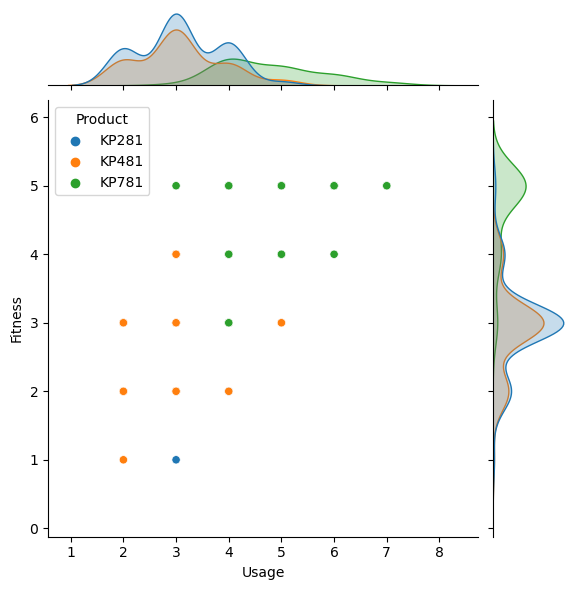

In [34]:
sns.jointplot(data = df, y="Fitness", x="Usage", hue = "Product")

##### usage vs fitness vs product
    => usage >=4 and fitness >=4 likely to go for KP781
    => KP281 and KP481 following same trend

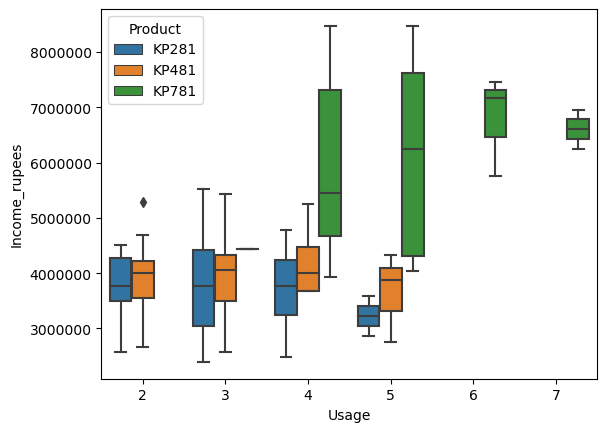

In [35]:
sns.boxplot(data = df, y="Income_rupees", x="Usage", hue = "Product")
plt.ticklabel_format(useOffset=False, style='plain',axis="y")
plt.show()

##### with the increase in usage the probability of buying KP281 is decreasing even in lower income class

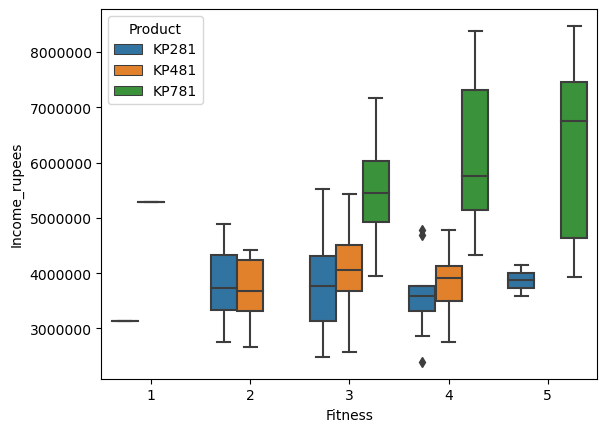

In [36]:
sns.boxplot(data = df, y="Income_rupees", x="Fitness", hue = "Product")
plt.ticklabel_format(useOffset=False, style='plain',axis="y")
plt.show()

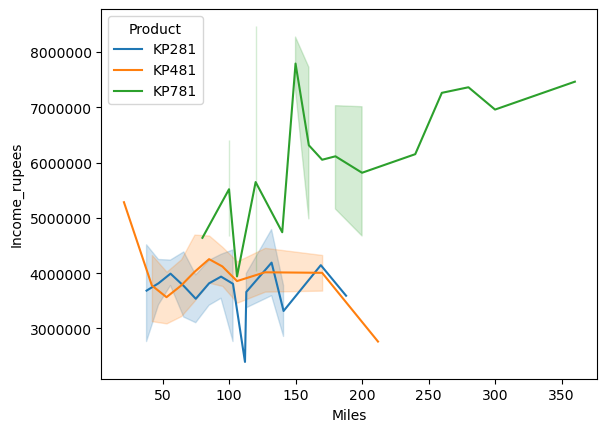

In [37]:
sns.lineplot(data =df, x="Miles", y= "Income_rupees", hue = "Product")
plt.ticklabel_format(useOffset=False, style='plain',axis="y")
plt.show()

##### miles vs income vs product
    => income greaterthan 45L and miles greaterthan 140 will go for KP781

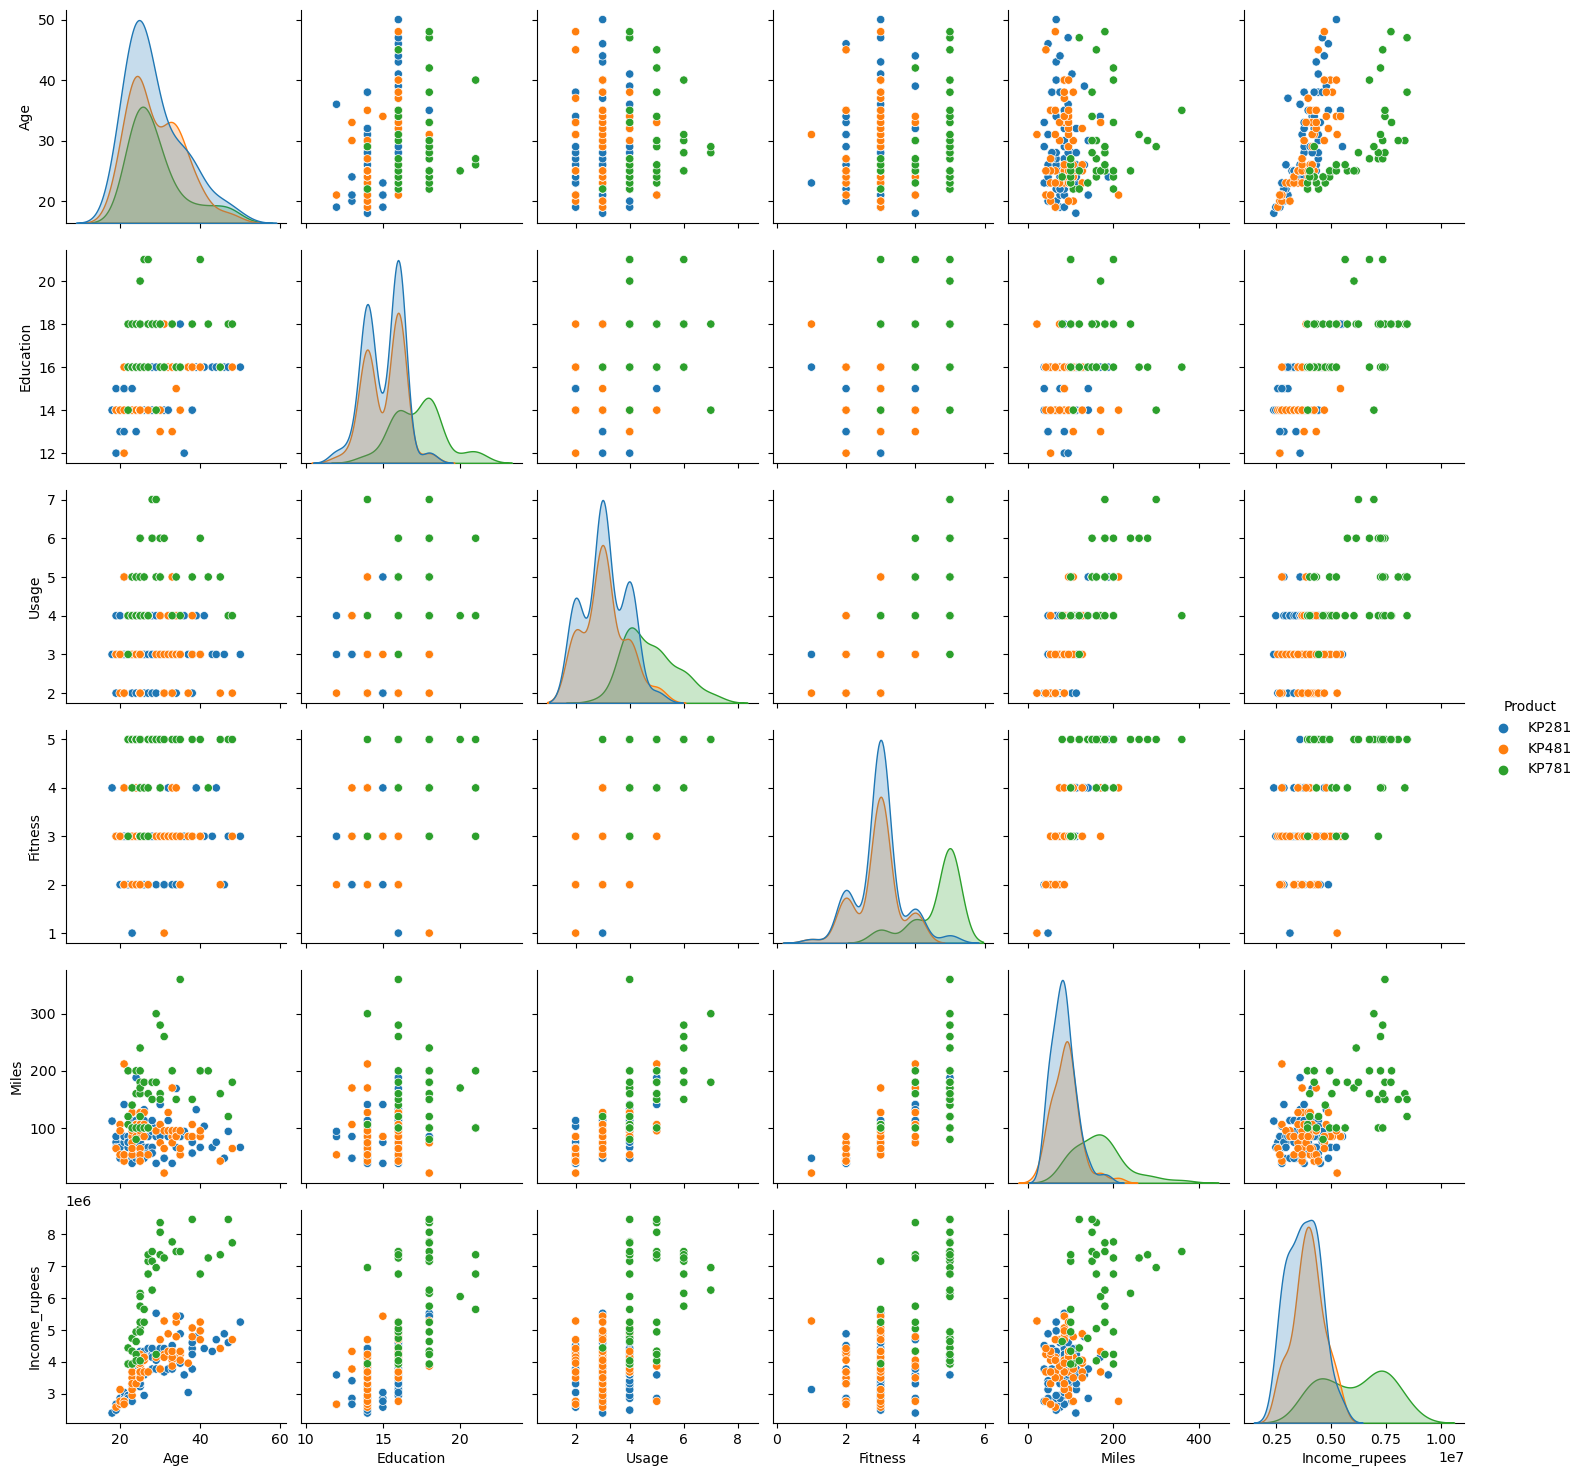

In [38]:
sns.pairplot(data=df[["Age", "Education","Usage","Fitness","Miles","Income_rupees","Product"]], hue = "Product")

<AxesSubplot:>

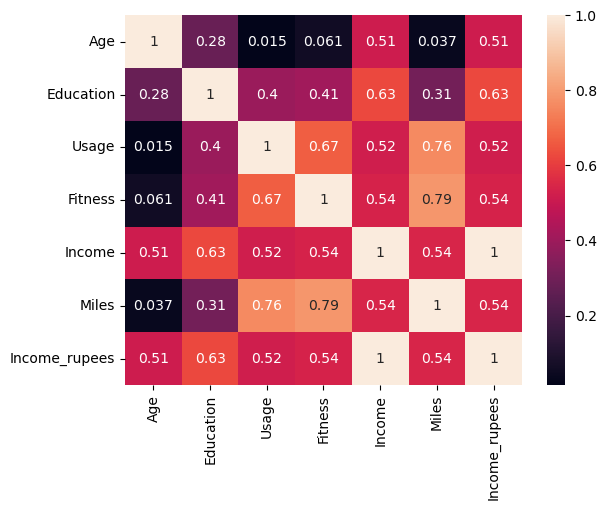

In [39]:
sns.heatmap(df.corr(), annot=True)

### KP781
    => income greater than 58L will buy KP781
    => for income greater than 40L they will still go for KP781 if their age range is 22-26
    => usage >=4 and fitness >=4 likely to go for KP781
    => income greaterthan 45L and miles greaterthan 140 will go for KP781

### KP481
    => median income is 40L
    => average income is 39.6L
    
    
### KP281
    => median income is 37.7L
    => average income is 37.5L

In [40]:
df2 = df[(df["Product"] != "KP781")]

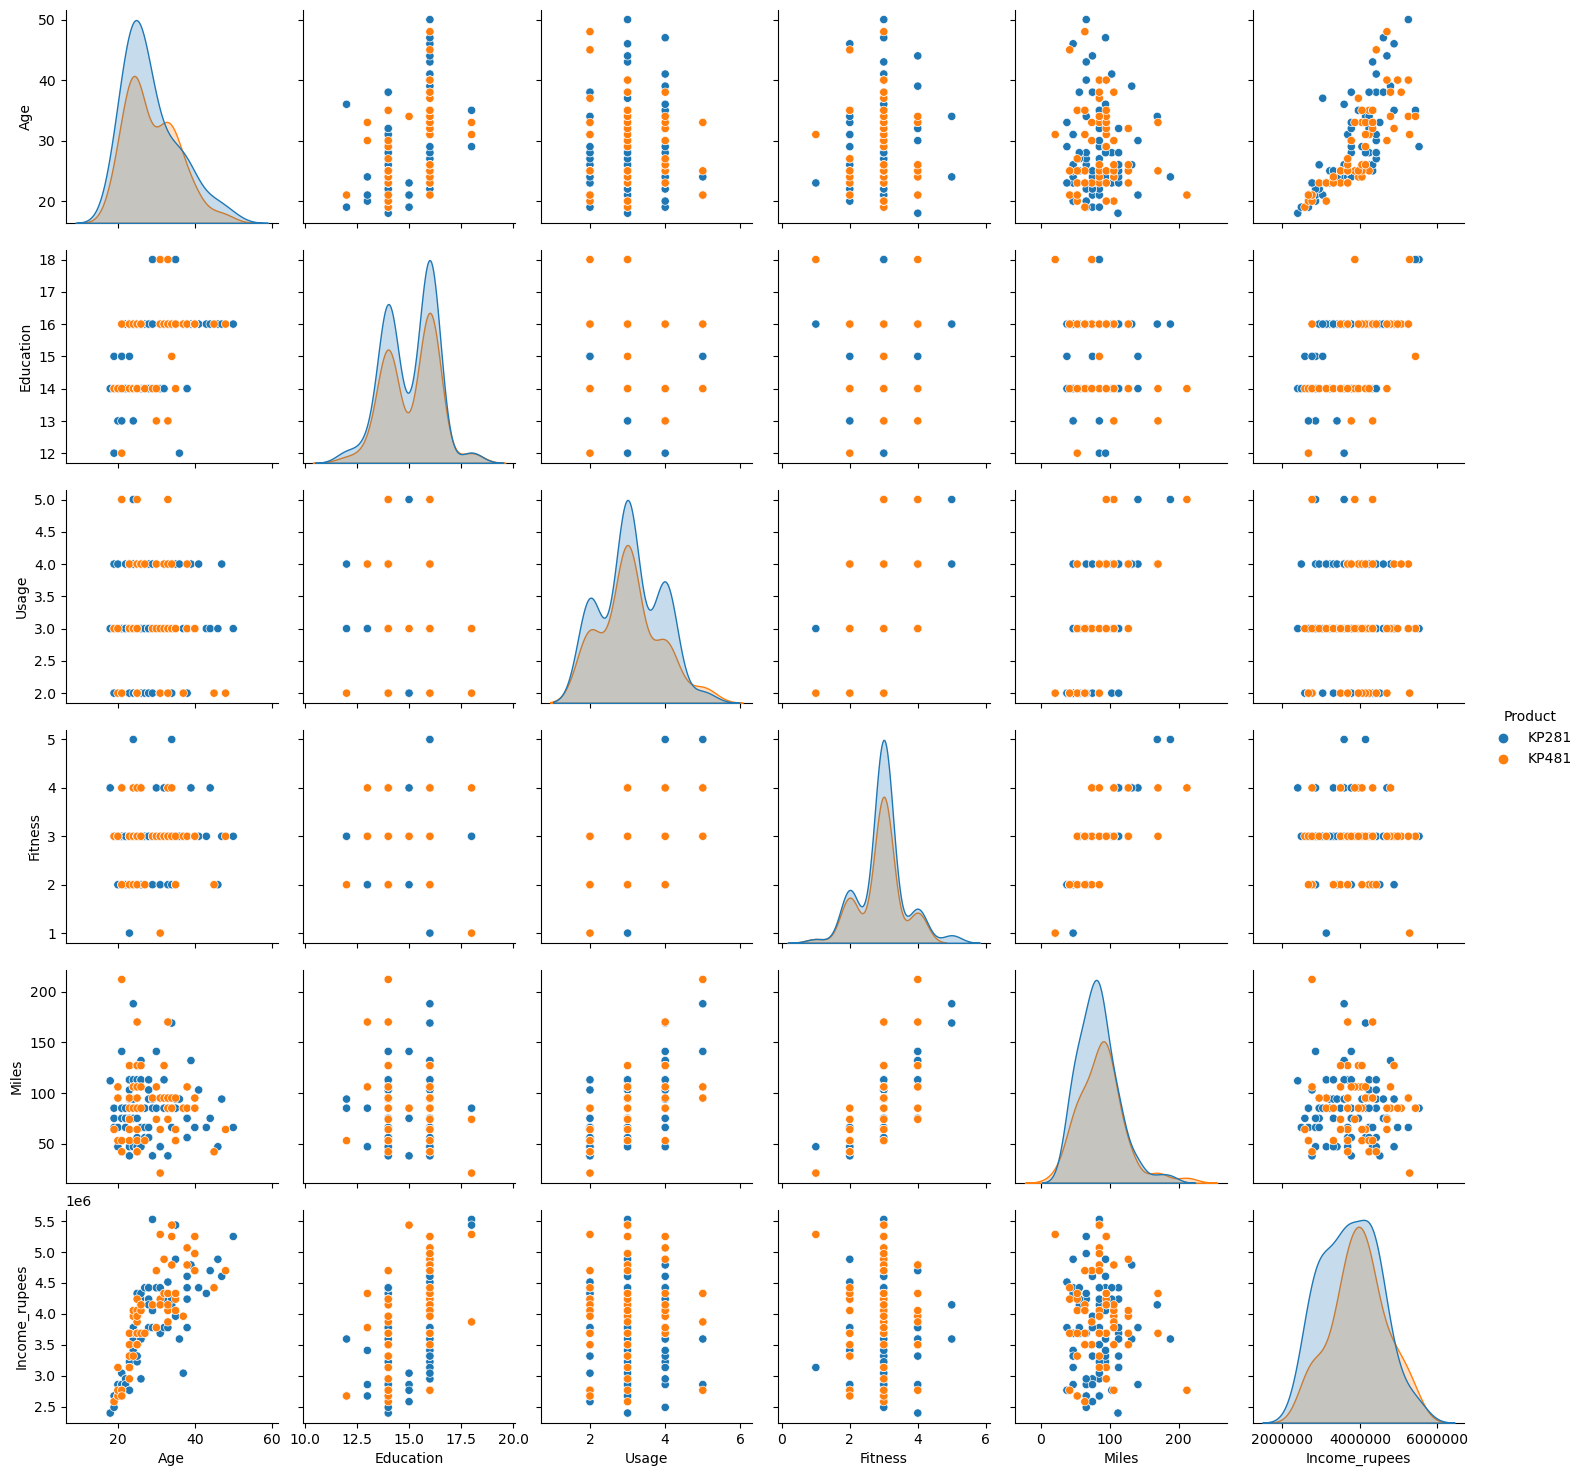

In [41]:
sns.pairplot(data=df2[["Age", "Education","Usage","Fitness","Miles","Income_rupees","Product"]], hue = "Product")
plt.ticklabel_format(useOffset=False, style='plain',axis="x")
plt.show()

###
    
### from above graphs for data of product KP281 and 481
    => there is very little to no difference between the products kp281 and kp481
    => kp281 (80units * 1500) = 1.2L kp481(60units * 1750) = 1.05L => total of 2.25L
    => so instead of two different product make only one which will even reduce the production costs
    => if decided to go with one of (kp281/kp481) to not loose any profit it should be priced at 1610
    => if you sell it at 1610 => 140units * 1610 = 2.25L
    => but with saved production costs still you will be in profit
    
    
    

## converting continues data to categorical data

#### columns converted are
    => education into 5 bins: g12-13, g14-15,g16-17,g18-19,g20-22
    => age into 5 bins: G18-24, G25-30, G31-36, G37-42, G43-50
    => miles into 6 bins: g20-50,g50-80,g80-110,g110-140,g140-170,g170-360
    => Income_rupees: g23-31,g31-39,g39-47,g47-55,g55-64,g64-85
    
   

In [42]:
df_new = df.copy()
df_new.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_rupees
0,KP281,18,Male,14,Single,3,4,29562,112,2394522
1,KP281,19,Male,15,Single,2,3,31836,75,2578716
2,KP281,19,Female,14,Partnered,4,3,30699,66,2486619
3,KP281,19,Male,12,Single,3,3,32973,85,2670813
4,KP281,20,Male,13,Partnered,4,2,35247,47,2855007


In [43]:
df_new["Education"] = pd.cut(x = df_new["Education"], bins = [10,13,15,17,19,23],labels = ["g12-13", "g14-15","g16-17","g18-19","g20-22"])

In [44]:
df_new["Age"] = pd.cut(x = df_new["Age"], bins = [17,24,30,36,42,50],labels = ["G18-24","G25-30","G31-36","G37-42","G43-50"])

In [45]:
df_new["Income_rupees"] = pd.cut(x = df_new["Income_rupees"], bins = [2300000,3100000,3900000,4700000,5500000,6400000,8500000],labels = ["g23-31","g31-39","g39-47","g47-55","g55-64","g64-85"])

In [46]:
df_new["Miles"] = pd.cut(x = df_new["Miles"], bins = [20,50,80,110,140,170,360],labels = ["g20-50","g50-80","g80-110","g110-140","g140-170","g170-360"])

In [47]:
df_new.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_rupees
0,KP281,G18-24,Male,g14-15,Single,3,4,29562,g110-140,g23-31
1,KP281,G18-24,Male,g14-15,Single,2,3,31836,g50-80,g23-31
2,KP281,G18-24,Female,g14-15,Partnered,4,3,30699,g50-80,g23-31
3,KP281,G18-24,Male,g12-13,Single,3,3,32973,g80-110,g23-31
4,KP281,G18-24,Male,g12-13,Partnered,4,2,35247,g20-50,g23-31


###

## MARGINAL PROBABILITIES

In [48]:
def func1(col, val):
    return "{0:.4f}".format(round(df_new[df_new[col] == val].shape[0] / df_new.shape[0],4))


In [49]:
product_KP781_p = func1("Product", "KP781")
product_KP481_p = func1("Product", "KP481")
product_KP281_p = func1("Product", "KP281")
print(product_KP781_p, product_KP481_p, product_KP281_p)

0.2222 0.3333 0.4444


##### probabilities based on product
    => 0.22 is the probability of selling your next product is KP781
    => 0.33 is the probability of selling your next product is KP481
    => 0.44 is the probability of selling your next product is KP281

In [50]:
age_g18_24_p = func1("Age", "G18-24")
age_g25_30_p = func1("Age", "G25-30")
age_g31_36_p = func1("Age", "G31-36")
age_g37_42_p = func1("Age", "G37-42")
age_g43_50_p = func1("Age", "G43-50")
print(age_g18_24_p, age_g25_30_p, age_g31_36_p, age_g37_42_p, age_g43_50_p)

0.3000 0.3667 0.1833 0.0944 0.0556


##### probabilities based on age
    => 0.3  is the probability of your next customer from age group 18-24
    => 0.36 is the probability of your next customer from age group 25-30
    => 0.18 is the probability of your next customer from age group 31-36
    => 0.09 is the probability of your next customer from age group 37-42
    => 0.05 is the probability of your next customer from age group 42-50

In [51]:
gender_male_p = func1("Gender", "Male")
gender_female_p = func1("Gender", "Female")
print(gender_male_p, gender_female_p)

0.5778 0.4222


##### probabilities based on age
    => 0.57 is the probability of your customer being male
    => 0.42 is the probability of your customer being female

In [52]:
maritalstatus_single_p = func1("MaritalStatus", "Single")
maritalstatus_partnered_p = func1("MaritalStatus", "Partnered")
print(maritalstatus_single_p, maritalstatus_partnered_p)

0.4056 0.5944


##### probabilities based on maritalstatus
    => 0.4056 is the probability of your customer being single
    => 0.5944 is the probability of your customer being partnered

In [53]:
education_g12_13_p = func1("Education", "g12-13")
education_g14_15_p = func1("Education", "g14-15")
education_g16_17_p = func1("Education", "g16-17")
education_g18_19_p = func1("Education", "g18-19")
education_g20_22_p = func1("Education", "g20-22")
print(education_g12_13_p, education_g14_15_p, education_g16_17_p, education_g18_19_p, education_g20_22_p)

0.0444 0.3333 0.4722 0.1278 0.0222


##### probabilities based on education

In [54]:
usage_2_p = func1("Usage",2)
usage_3_p = func1("Usage",3)
usage_4_p = func1("Usage",4)
usage_5_p = func1("Usage",5)
usage_6_p = func1("Usage",6)
usage_7_p = func1("Usage",7)
print(usage_2_p,usage_3_p,usage_4_p, usage_5_p,usage_6_p, usage_7_p)

0.1833 0.3833 0.2889 0.0944 0.0389 0.0111


##### probabilities based on usage

In [55]:
fitness_1_p = func1("Fitness",1)
fitness_2_p = func1("Fitness",2)
fitness_3_p = func1("Fitness",3)
fitness_4_p = func1("Fitness",4)
fitness_5_p = func1("Fitness",5)
print(fitness_1_p,fitness_2_p,fitness_3_p,fitness_4_p,fitness_5_p)

0.0111 0.1444 0.5389 0.1333 0.1722


##### probabilities based on fitness

In [56]:
miles_g20_50_p = func1("Miles", "g20-50")
miles_g50_80_p = func1("Miles", "g50-80")
miles_g80_110_p = func1("Miles", "g80-110")
miles_g110_140_p = func1("Miles", "g110-140")
miles_g140_170_p = func1("Miles", "g140-170")
miles_g170_360_p = func1("Miles", "g170-360")
print(miles_g20_50_p, miles_g50_80_p, miles_g80_110_p, miles_g110_140_p,miles_g140_170_p, miles_g170_360_p)

0.0944 0.2389 0.3667 0.1111 0.0833 0.1056


##### probabilities based on miles

In [57]:
income_rupees_g23_31_p = func1("Income_rupees", "g23-31")
income_rupees_g31_39_p = func1("Income_rupees", "g31-39")
income_rupees_g39_47_p = func1("Income_rupees", "g39-47")
income_rupees_g47_55_p = func1("Income_rupees", "g47-55")
income_rupees_g55_64_p = func1("Income_rupees", "g55-64")
income_rupees_g64_85_p = func1("Income_rupees", "g64-85")
print(income_rupees_g23_31_p, income_rupees_g31_39_p, income_rupees_g39_47_p, income_rupees_g47_55_p,income_rupees_g55_64_p, income_rupees_g64_85_p)

0.1389 0.2667 0.3389 0.1167 0.0333 0.1056


###### probabilities based on Income_rupees

## CONDITIONAL PROBABILITIES

#### probability of buying product x given the person gender
    => p(x/gender) = p(x intersection gender) / p(gender)


In [58]:
p_kp781_male = df_new[(df_new["Product"] == "KP781") & (df_new["Gender"] == "Male")].shape[0] / df_new.shape[0]
p_kp781bymale = round(p_kp781_male / float(gender_male_p),4)
p_kp781bymale

0.3173

In [59]:
p_kp481_male = df_new[(df_new["Product"] == "KP481") & (df_new["Gender"] == "Male")].shape[0] / df_new.shape[0]
p_kp481bymale = round(p_kp481_male / float(gender_male_p),4)
p_kp481bymale

0.2981

In [60]:
p_kp281_male = df_new[(df_new["Product"] == "KP281") & (df_new["Gender"] == "Male")].shape[0] / df_new.shape[0]
p_kp281bymale = round(p_kp281_male / float(gender_male_p),4)
p_kp281bymale

0.3846

In [61]:
p_kp781_female = df_new[(df_new["Product"] == "KP781") & (df_new["Gender"] == "Female")].shape[0] / df_new.shape[0]
p_kp781byfemale = round(p_kp781_female / float(gender_female_p),4)
p_kp481_female = df_new[(df_new["Product"] == "KP481") & (df_new["Gender"] == "Female")].shape[0] / df_new.shape[0]
p_kp481byfemale = round(p_kp481_female / float(gender_female_p),4)
p_kp281_female = df_new[(df_new["Product"] == "KP281") & (df_new["Gender"] == "Female")].shape[0] / df_new.shape[0]
p_kp281byfemale = round(p_kp281_female / float(gender_female_p),4)
print(p_kp781byfemale, p_kp481byfemale, p_kp281byfemale)

0.0921 0.3816 0.5263


##### given gender is male
    => probability of buying kp781 = 0.317
    => probability of buying kp481 = 0.298
    => probability of buying kp281 = 0.385

##### given gender is female
    => probability of buying kp781 = 0.092
    => probability of buying kp481 = 0.382
    => probability of buying kp281 = 0.526
    
#### males have more probability of buying kp781 than females
#### females have more probability of buying kp481 and kp281 than males

#### probability of buying product x given the person marital status
    => p(x/maritalstatus) = p(x intersection maritalstatus) / p(maritalstatus)

In [62]:
def func_conditional(product, col, val, denom):
    temp1 = df_new[(df_new["Product"] == product ) & (df_new[col] == val)].shape[0] / df_new.shape[0]
    return "{0:.4f}".format(round(temp1 / float(denom),4))

In [63]:
p_kp781bysingle = func_conditional("KP781", "MaritalStatus", "Single", maritalstatus_single_p)
p_kp481bysingle = func_conditional("KP481", "MaritalStatus", "Single", maritalstatus_single_p)
p_kp281bysingle = func_conditional("KP281", "MaritalStatus", "Single", maritalstatus_single_p)
p_kp781bypartnered = func_conditional("KP781", "MaritalStatus", "Partnered", maritalstatus_partnered_p)
p_kp481bypartnered = func_conditional("KP481", "MaritalStatus", "Partnered", maritalstatus_partnered_p)
p_kp281bypartnered = func_conditional("KP281", "MaritalStatus", "Partnered", maritalstatus_partnered_p)
print(p_kp781bysingle, p_kp481bysingle, p_kp281bysingle)
print(p_kp781bypartnered, p_kp481bypartnered, p_kp281bypartnered)

0.2329 0.3287 0.4383
0.2150 0.3365 0.4486


#### probability of buying product x given the person's fitness
    => p(x/fitness) = p(x intersection fitness) / p(fitness)

In [64]:
p_kp781byf1 = func_conditional("KP781", "Fitness", 1 , fitness_1_p)
p_kp781byf2 = func_conditional("KP781", "Fitness", 2 , fitness_2_p)
p_kp781byf3 = func_conditional("KP781", "Fitness", 3 , fitness_3_p)
p_kp781byf4 = func_conditional("KP781", "Fitness", 4 , fitness_4_p)
p_kp781byf5 = func_conditional("KP781", "Fitness", 5 , fitness_5_p)
p_kp481byf1 = func_conditional("KP481", "Fitness", 1 , fitness_1_p)
p_kp481byf2 = func_conditional("KP481", "Fitness", 2 , fitness_2_p)
p_kp481byf3 = func_conditional("KP481", "Fitness", 3 , fitness_3_p)
p_kp481byf4 = func_conditional("KP481", "Fitness", 4 , fitness_4_p)
p_kp481byf5 = func_conditional("KP481", "Fitness", 5 , fitness_5_p)
p_kp281byf1 = func_conditional("KP281", "Fitness", 1 , fitness_1_p)
p_kp281byf2 = func_conditional("KP281", "Fitness", 2 , fitness_2_p)
p_kp281byf3 = func_conditional("KP281", "Fitness", 3 , fitness_3_p)
p_kp281byf4 = func_conditional("KP281", "Fitness", 4 , fitness_4_p)
p_kp281byf5 = func_conditional("KP281", "Fitness", 5 , fitness_5_p)
print(p_kp781byf1, p_kp781byf2, p_kp781byf3, p_kp781byf4, p_kp781byf5)
print(p_kp481byf1, p_kp481byf2, p_kp481byf3, p_kp481byf4, p_kp481byf5)
print(p_kp281byf1, p_kp281byf2, p_kp281byf3, p_kp281byf4, p_kp281byf5)

0.0000 0.0000 0.0412 0.2917 0.9356
0.5005 0.4617 0.4021 0.3334 0.0000
0.5005 0.5386 0.5567 0.3751 0.0645


##### given fitness
    => if fitness == 5 then with 0.935 probability they will buy KP781
    => if fitness (1-4) then probability of buying KP281 is slightly more than KP481

#### probability of buying product x given the person's education
    => p(x/education) = p(x intersection education) / p(education)

In [65]:
p_kp781byg12_13 = func_conditional("KP781", "Education", "g12-13" , education_g12_13_p)
p_kp781byg14_15 = func_conditional("KP781", "Education", "g14-15" , education_g14_15_p)
p_kp781byg16_17 = func_conditional("KP781", "Education", "g16-17" , education_g16_17_p)
p_kp781byg18_19 = func_conditional("KP781", "Education", "g18-19" , education_g18_19_p)
p_kp781byg20_22 = func_conditional("KP781", "Education", "g20-22" , education_g20_22_p)
p_kp481byg12_13 = func_conditional("KP481", "Education", "g12-13" , education_g12_13_p)
p_kp481byg14_15 = func_conditional("KP481", "Education", "g14-15" , education_g14_15_p)
p_kp481byg16_17 = func_conditional("KP481", "Education", "g16-17" , education_g16_17_p)
p_kp481byg18_19 = func_conditional("KP481", "Education", "g18-19" , education_g18_19_p)
p_kp481byg20_22 = func_conditional("KP481", "Education", "g20-22" , education_g20_22_p)
p_kp281byg12_13 = func_conditional("KP281", "Education", "g12-13" , education_g12_13_p)
p_kp281byg14_15 = func_conditional("KP281", "Education", "g14-15" , education_g14_15_p)
p_kp281byg16_17 = func_conditional("KP281", "Education", "g16-17" , education_g16_17_p)
p_kp281byg18_19 = func_conditional("KP281", "Education", "g18-19" , education_g18_19_p)
p_kp281byg20_22 = func_conditional("KP281", "Education", "g20-22" , education_g20_22_p)
print(p_kp781byg12_13, p_kp781byg14_15, p_kp781byg16_17, p_kp781byg18_19, p_kp781byg20_22)
print(p_kp481byg12_13, p_kp481byg14_15, p_kp481byg16_17, p_kp481byg18_19, p_kp481byg20_22)
print(p_kp281byg12_13, p_kp281byg14_15, p_kp281byg16_17, p_kp281byg18_19, p_kp281byg20_22)

0.0000 0.0333 0.1765 0.8259 1.0010
0.3754 0.4000 0.3647 0.0869 0.0000
0.6256 0.5667 0.4588 0.0869 0.0000


##### given education
    => education in g20-22 they are buying kp781 
    => education in g18-19 mostly buying kp781 with 0.82 probability
    => education in g12-13 mostly buying kp281 with 0.625 probability

In [66]:
def func_conditional_income():
    lst_income = ["g23-31","g31-39","g39-47","g47-55","g55-64","g64-85"]
    lst_income_probs = [income_rupees_g23_31_p, income_rupees_g31_39_p, income_rupees_g39_47_p, income_rupees_g47_55_p,income_rupees_g55_64_p, income_rupees_g64_85_p]
    lst_product = ["KP781", "KP481", "KP281"]
    for i in lst_product:
        for j in range(0,len(lst_income)):
            print(func_conditional(i, "Income_rupees", lst_income[j] ,  lst_income_probs[j]), end = " ")
        print("")

func_conditional_income()

0.0000 0.0000 0.1639 0.2856 0.8342 0.9996 
0.2800 0.4166 0.3934 0.4284 0.0000 0.0000 
0.7199 0.5833 0.4426 0.2856 0.1668 0.0000 


##### given Income
    => for income in g23-31(i.e 23L to 31L) 0.71 probability that they will buy kp281
    => for income in g47-55 0.42 probability they will buy kp481

###

## USER PROFILE FUNCTION
    => give the user details to function which in return give probability of buying of each product
    => Age : G18-24, G25-30, G31-36, G37-42, G43-50
    => Gender : Male, Female
    => Education : g12-13, g14-15,g16-17,g18-19,g20-22
    => MaritaStatus: Single, Partnered
    => Usage : 2,3,4,5,6,7
    => Fitness : 1,2,3,4,5
    => Miles : g20-50,g50-80,g80-110,g110-140,g140-170,g170-360
    => Income_rupees : g23-31,g31-39,g39-47,g47-55,g55-64,g64-85

In [67]:
def user_function(**kwargs):
    df_temp = df_new.copy()
    filtered_data = []
    for col, val in kwargs.items():
        df_temp = df_temp.loc[df_new[col] == val]
        filtered_data.append(df_temp.copy())
    if df_temp.shape[0] == 0:
        for d in filtered_data:
            if d.shape[0] != 0:
                df_temp = d
        if df_temp.shape[0] == 0:
            return [0,0,0]
    n1 = df_temp[df_temp["Product"] == "KP781"].shape[0]/ df_temp.shape[0]
    n1 = "{0:.4f}".format(round(n1,4))
    n2 = df_temp[df_temp["Product"] == "KP481"].shape[0]/ df_temp.shape[0]
    n2 = "{0:.4f}".format(round(n2,4))
    n3 = df_temp[df_temp["Product"] == "KP281"].shape[0]/ df_temp.shape[0]
    n3 = "{0:.4f}".format(round(n3,4))
    print("probability of buying KP781: ", n1)
    print("probability of buying KP481: ", n2)
    print("probability of buying KP281: ", n3)

In [68]:
user_function(Gender = "Male", Age = "g18-24", Income_rupees = "g31-39", Usage = 4)

probability of buying KP781:  0.3173
probability of buying KP481:  0.2981
probability of buying KP281:  0.3846


#### example: 
    => a user with gender = male, age = g18-24, income_rupees = g31-39, usgae = 4
        so for this user the probability of buying KP781 is 0.3173
                         the probability of buying KP481 is 0.2981
                         the probability of buying KP281 is 0.3846
        
    
    